<a href="https://colab.research.google.com/github/yoshitha1209/Machine-Learning/blob/main/23003_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Parameters: {'max_depth': 45, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 104}


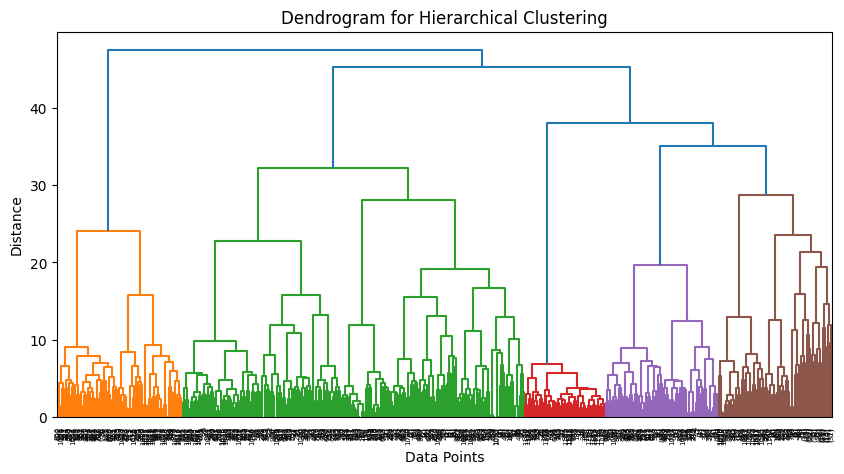

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load your dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Copy of training_mathbert(1).xlsx")  # Update with your actual file path

# Split into features and target variable
X = df.drop(columns=['output'])  # Features (embeddings)
y = df['output']  # Target variable (correctness score)

# Define hyperparameter search space (FIXED max_features)
param_dist = {
    'n_estimators': randint(50, 300),  # Number of trees
    'max_depth': [None] + list(range(5, 50, 5)),  # Tree depth
    'min_samples_split': randint(2, 10),  # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 10),  # Minimum samples per leaf node
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print("Best Parameters:", random_search.best_params_)

# A5 - Clustering#

# Agglomerative Clustering (Hierarchical)

# Plot dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=10)  # Limits depth for clarity
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative Clustering with chosen n_clusters (adjusted based on dendrogram)
agg_clustering = AgglomerativeClustering(n_clusters=36, linkage='ward')
agg_labels = agg_clustering.fit_predict(X)

# Add cluster labels to the dataset
df['AggloCluster'] = agg_labels

In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

# Fit and predict clusters
dbscan_labels = dbscan.fit_predict(X)

# Add DBSCAN cluster labels to dataset
df['DBSCAN_Cluster'] = dbscan_labels

# Count number of noise points (-1 means noise)
n_noise = np.sum(dbscan_labels == -1)
print(f"Number of Noise Points (DBSCAN): {n_noise}")

#Evaluating Clustering

# Silhouette Score for Agglomerative Clustering
agg_silhouette = silhouette_score(X, agg_labels)
print(f"Silhouette Score (Agglomerative): {agg_silhouette}")

# Silhouette Score for DBSCAN (excluding noise points)
dbscan_silhouette = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"Silhouette Score (DBSCAN, excluding noise): {dbscan_silhouette}")


# Davies-Bouldin Score for Agglomerative Clustering
agg_db_score = davies_bouldin_score(X, agg_labels)
print(f"Davies-Bouldin Score (Agglomerative): {agg_db_score}")

# Davies-Bouldin Score for DBSCAN (excluding noise points)
if len(set(dbscan_labels)) > 1:  # Avoids error if all points are noise
    dbscan_db_score = davies_bouldin_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Davies-Bouldin Score (DBSCAN): {dbscan_db_score}")
else:
    print("DBSCAN formed only one cluster or all points are noise.")


# Calinski-Harabasz Score for Agglomerative Clustering
agg_ch_score = calinski_harabasz_score(X, agg_labels)
print(f"Calinski-Harabasz Score (Agglomerative): {agg_ch_score}")

# Calinski-Harabasz Score for DBSCAN (excluding noise)
if len(set(dbscan_labels)) > 1:
    dbscan_ch_score = calinski_harabasz_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Calinski-Harabasz Score (DBSCAN): {dbscan_ch_score}")
else:
    print("DBSCAN formed only one cluster or all points are noise.")

Number of Noise Points (DBSCAN): 1079
Silhouette Score (Agglomerative): 0.20065598337190557
Silhouette Score (DBSCAN, excluding noise): 0.8917553628333379
Davies-Bouldin Score (Agglomerative): 1.9207879799942467
Davies-Bouldin Score (DBSCAN): 0.1776917577385812
Calinski-Harabasz Score (Agglomerative): 45.82431567457839
Calinski-Harabasz Score (DBSCAN): 2362.7919188652413
